# Life expectancy GDP

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [26]:
#csv-datei laden und ersten Überblick zum Datensatz verschaffen
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [27]:
#column-name ändern da dieser ein wenig zu lang wirkt
df.rename(columns={"Life expectancy at birth (years)":"LEABY"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [29]:
df.describe()

,Year,LEABY,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [30]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [31]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


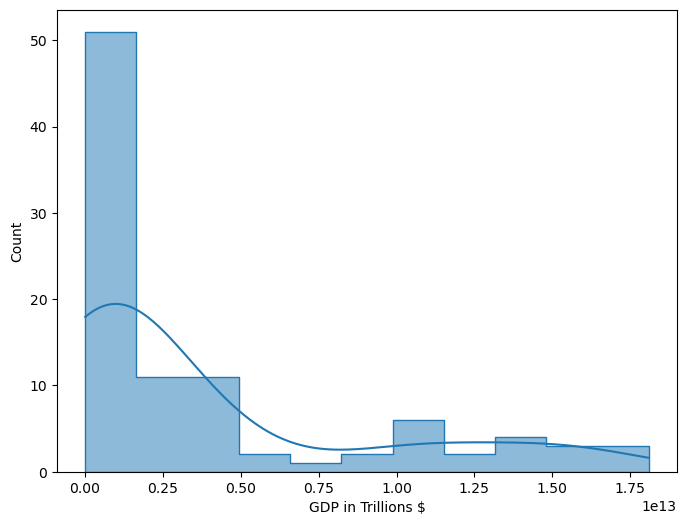

In [32]:
#Verteilung des GDP und LEABY veranschaulichen
plt.figure(figsize =(8,6))
sns.histplot(df.GDP, element = "step", kde = True)
plt.xlabel("GDP in Trillions $");

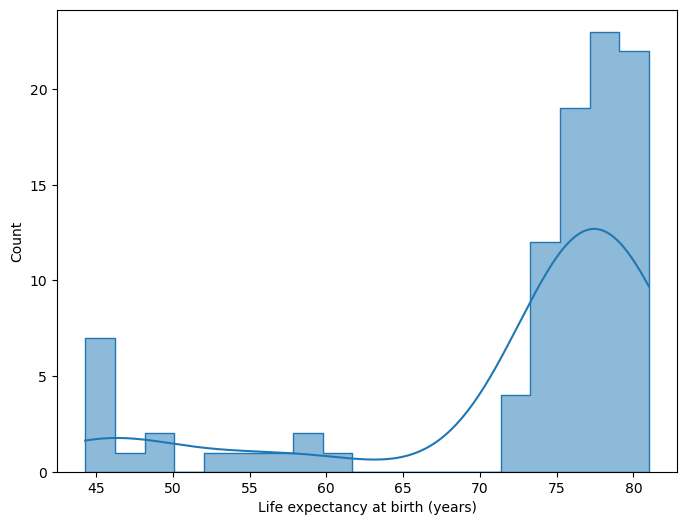

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(df.LEABY, element = "step", kde = True)
plt.xlabel("Life expectancy at birth (years)");

In [34]:
#Verteilung pro Land veranschaulichen

In [35]:
df_Means = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [36]:
df_Means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


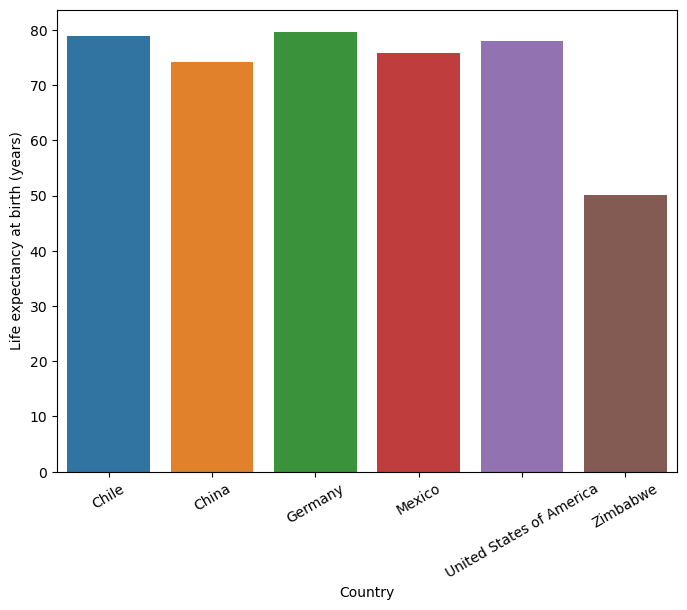

In [37]:
#Bar-Charts Land zur Lebenserwartung
plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="LEABY", data = df_Means)
plt.xlabel("Country")
plt.ylabel("Life expectancy at birth (years)")
plt.xticks(rotation=30);

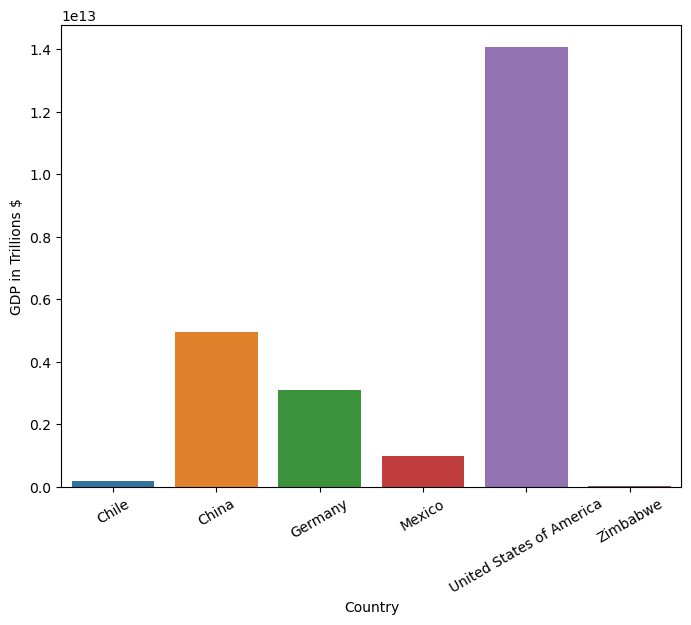

In [38]:
#Bar-Charts Land zu GDP
plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="GDP", data = df_Means)
plt.xlabel("Country")
plt.ylabel("GDP in Trillions $")
plt.xticks(rotation=30);

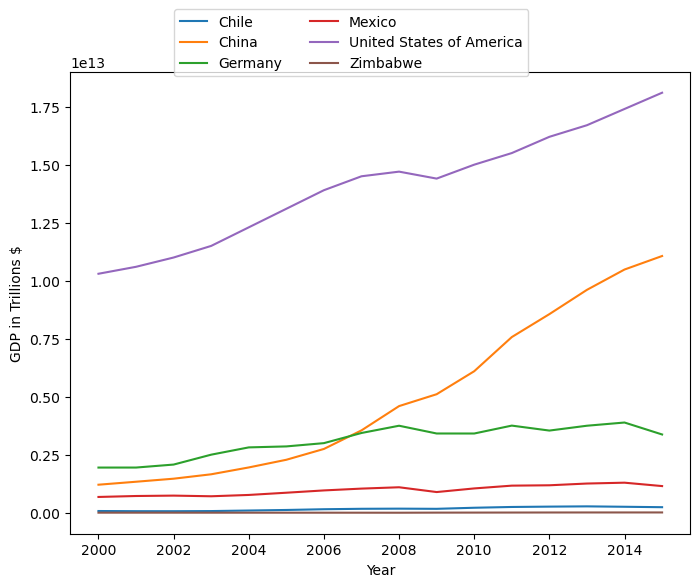

In [39]:
#Line-Charts GDP pro Land
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.ylabel("GDP in Trillions $");

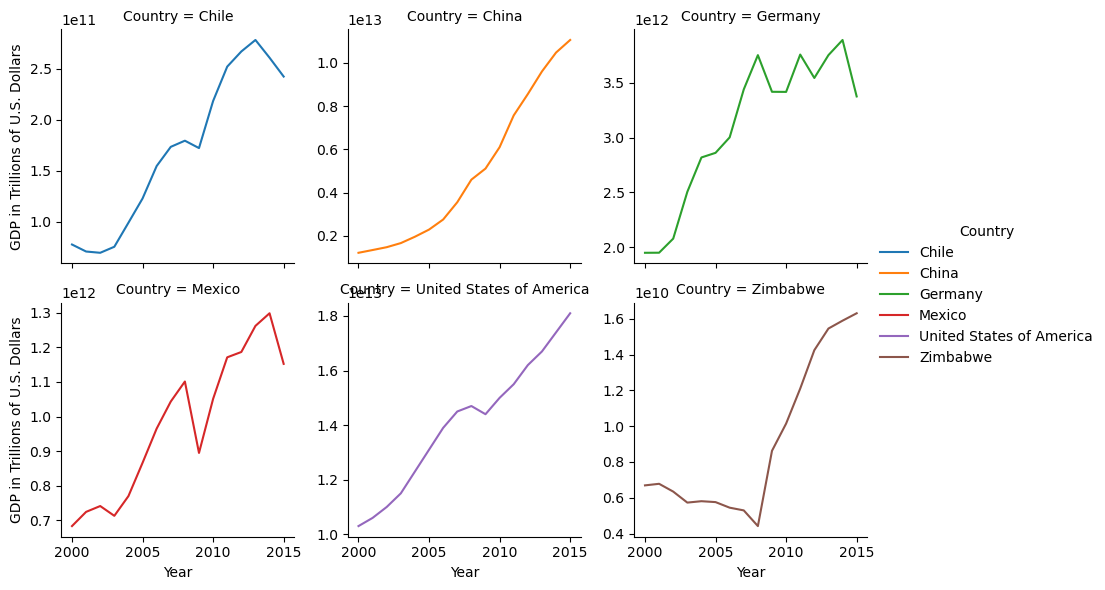

In [40]:
#Line-Charts im Facet Grid GDP pro Land
chartGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False)

chartGDP = (chartGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

chartGDP;

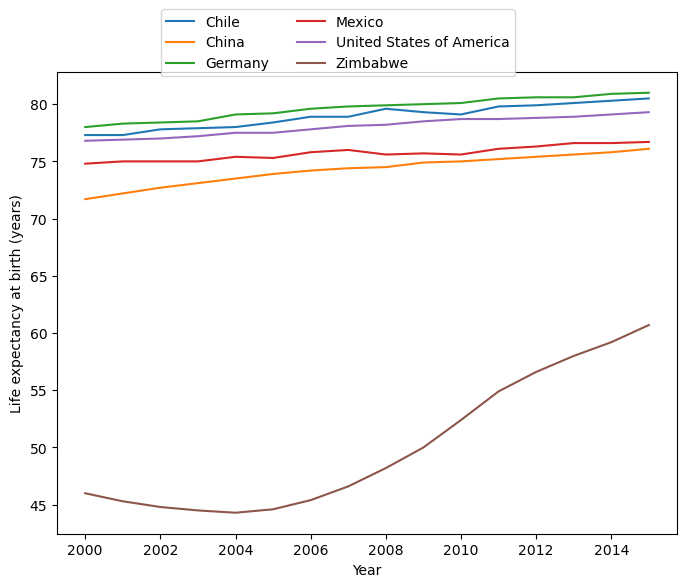

In [41]:
#Line-Charts Lebenserwartung pro Land
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.ylabel("Life expectancy at birth (years)");

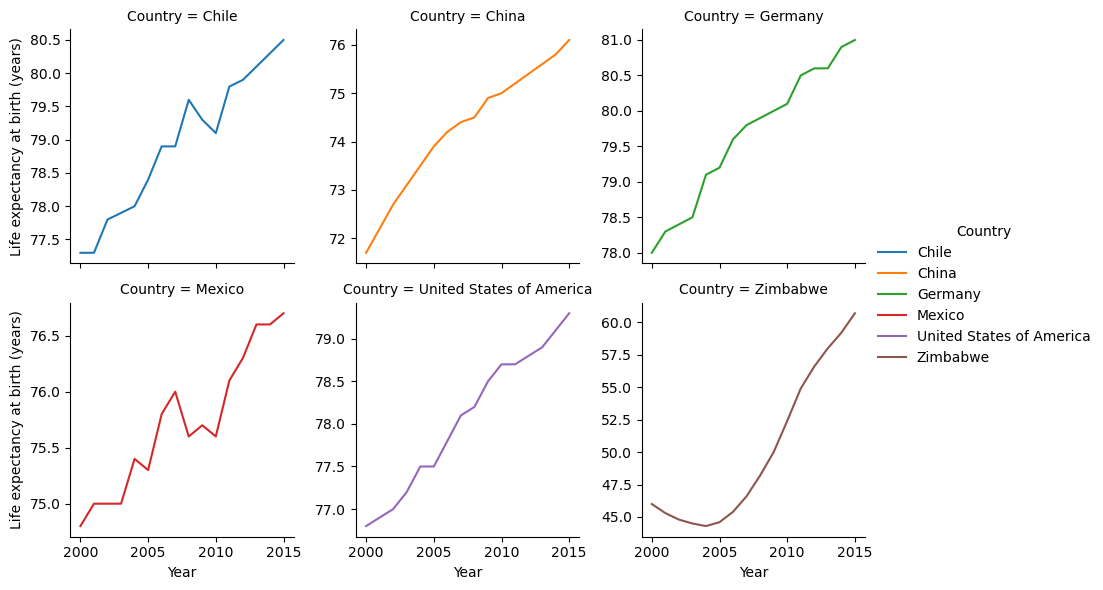

In [42]:
#Line-Charts im Facet Grid Lebenserwartung pro Land

chartLEABY = sns.FacetGrid(df, col="Country", col_wrap=3, hue= "Country", sharey = False)

chartLEABY = (chartLEABY.map(sns.lineplot, "Year", "LEABY")
             .add_legend()
             .set_axis_labels("Year", "Life expectancy at birth (years)"))

chartLEABY;

In [43]:
#Zusammenhang von GDP und LEABY veranschaulichen

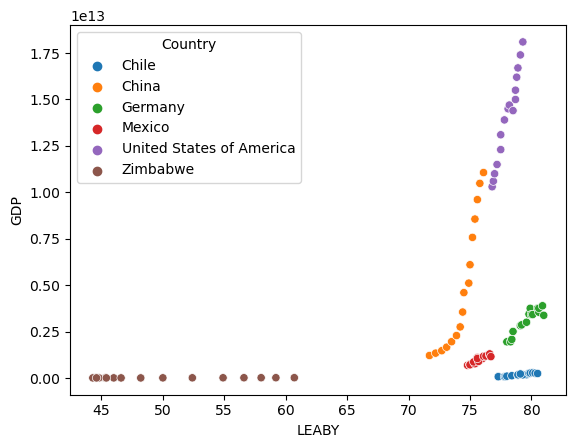

In [23]:
#Scatterplot von GDP zu Lebenserwartung
sns.scatterplot(x=df.LEABY, y = df.GDP, hue=df.Country);

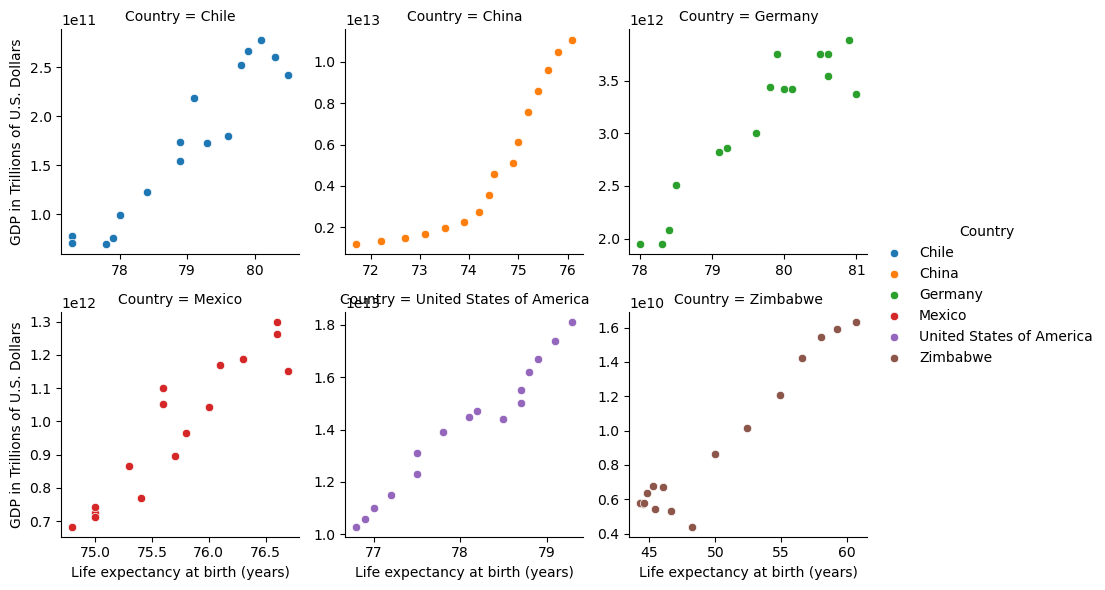

In [24]:
#Scatterplot im Facet Grid von GDP zu LEABY
scatter = sns.FacetGrid(df, col = "Country", col_wrap=3, hue="Country", sharey=False, sharex=False)

scatter = (scatter.map(sns.scatterplot, "LEABY", "GDP")
          .add_legend()
          .set_axis_labels("Life expectancy at birth (years)","GDP in Trillions of U.S. Dollars"))
scatter;